# **Reviews vs Reality.**

## **Business Understanding.**
### Background.
E-commerce is slowly but steadily climbing the ladder to be one of Kenya's economic backbones. With businesses shifting from the traditional trade, that included setting up shops and waiting for customers to walk around looking for what they need, to digital trade where all one needs to do is open an account on any social media platform, post whatever they're selling and just wait for notifications that someone needs their product. No need for physical shop, no pressure, just internet connection and the comfort of their homes.

However, such a strong growth in such an industry, comes with really stiff competition. Every seller wants to be the best, to sell the most and earn the most which in result pushes sellers to the extremes of buying fake reviews.

### Problem Statement.
In Kenya, entreprenuers, both young and old are turning to platforms like Jumia, Killimall, Jiji, PigiaMe among others to sell products and make ends meet. It's not only a business, but a survival.

The rise of fake reviews, however, threatens the honest business persons. There have been not only reports but also companies have come up and stated openly that they do, in fact, sell online reviews. This practice not only creates an unfair playing field for vendors because the vendors buying reviews are often better funded than the ones that do not but also denies the struggling vendors a way to earn a living.

As a result of fake reviews;
- Good products go unseen as the algorithms normally show products with high ratings so genuine sellers who actually rely on real customer feedback get burried in search results. 

- Honest sellers lose customers as with a low number of reviews, their products are percieved as lower quality.

Online platforms need a way to detect mismatches between reviews and ratings, to surface truly trustworthy sellers and protect buyers and sellers alike. This project seeks to help them both understand if the reviews are true or false.

### Project Objectives.
This project is looking to;
- Use Natural Language Processing and sentiment analysis to spot suspicious products whose ratings do not match what people are really saying.

### Success criteria.
When fake visisbility wins over genuine value, everyone is affected. What would spell success for this project would be that;

- Sellers get equal visibility based on real customer feedback.

- Customers get protected against cons

- Companies get to protect their customers from falling victims of fake reviews 

### Stakeholders.
- Customers: The individuals or businesses purchasing goods or services through the platform.

- Sellers/Merchants: Businesses or individuals who list and sell products or services on the platform. 

- Platform Providers: The company or organization that owns and operates the online commerce platform.

- Regulatory Bodies: Government agencies and other organizations that set rules and standards for online commerce, including consumer protection.

- Investors: Individuals or organizations that have provided funding for the platform. 

- Government and International Organizations: These entities are stakeholders due to their role in setting and enforcing regulations related to online commerce. 

### Project plan.

## **Data Understanding.**
### Data Source.
The data used in this project was collected from publicly accessible product pages on `Jumia Kenya` using web scraping techniques. Reviews were gathered from selected products in three categories: fashion, appliances, and other electronics.

The scraping was performed using Python libraries such as requests and BeautifulSoup as evident in the `Scraper` folder, and all information collected is visible to any user visiting the site. No login or bypassing of protections was required.

This data was collected strictly for educational and research purposes, with the intent of exploring the relationship between product star ratings and actual customer sentiment. It is not affiliated with, endorsed by, or intended to defame Jumia or any of its sellers. It simply aims to uncover insights from publicly available information and promote transparency in digital marketplaces.

The dataset is under the file path `Data/`.

### Why is the data suitable for this project?
Jumia Kenya is one of the most popular e-commerce platforms in Kenya, data from the platform not only provides a larger pool of sellers but also a richer variety of reviews which allows for a more comprehensive understanding of consumer behavior.

- The largest e-commerce companies have millions or even billions of transactions, providing a vast dataset to analyze. This allows for more robust statistical analysis and reduces the chance of drawing inaccurate conclusions based on limited data.

- Large companies also serve a diverse customer base, including demographics, geographic locations, and purchasing habits. This diverse data helps in identifying patterns that might be missed in smaller datasets focused on specific niches.

### Exploring the dataset for understanding.
In this section we will be carrying out both qualitative and quantitative analysis to understand the structure of the dataset as well as identify areas that would impact our analysis if left unchecked or simply not fixed.

#### Import dependencies and loading the dataset.
In this section we will be importing our dependencies that we will be using all through the project for our data cleaning, exploratory data analysis, NPL etc. We will also be loading the scraped dataset.

We are loading the dataset using pandas .read_csv() method.


In [54]:
# Import dependencies.
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
import re

# Load the dataset.
reviews = pd.read_csv('../Data/Raw/jumia_reviews.csv')

#### Qualitative Analysis.
Before our analysis, we will explore our data, to understand its structure and what it contains. We will also be looking at the contenet and making sure it is in good quality for analysis.

We will use the .head() method to access the first 5 rows of the data. This will help us understand what columns we have and what type of values they contain.

In [55]:
# Dataset preview.
reviews.head()

,product_name,category,review_title,review_text,rating,review_date,verified
0,Berrykey Hawaiian Shirt,fashion,big size not cotton,Not cotton,1,19-06-2025,Verified Purchase
1,Berrykey Hawaiian Shirt,fashion,Not satisfied,The material is bad.not what I expected,1,13-06-2025,Verified Purchase
2,Berrykey Hawaiian Shirt,fashion,I like it,It is okay,5,12-05-2025,Verified Purchase
3,Berrykey Hawaiian Shirt,fashion,I like it,The quality is good. It's worth the price,5,22-04-2025,Verified Purchase
4,Berrykey Hawaiian Shirt,fashion,good,Good,5,27-01-2025,Verified Purchase


From the output above, the data has 7 columns and it contains review data of products. To further explore the dataset's structure, we will use pandas .info() method. This method will give us the concise summary of our data, providing us with infomation on the number of rows and columns, number of non-null values, and the columns' datatype. 

In [56]:
# Get dataset's qualitative summary
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_name  362 non-null    object
 1   category      362 non-null    object
 2   review_title  362 non-null    object
 3   review_text   362 non-null    object
 4   rating        362 non-null    int64 
 5   review_date   362 non-null    object
 6   verified      362 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.9+ KB


The dataset contains data stored in 362 rows in columns named product_name, category, review_title, review_text, rating, review_date and verified. Out of the 7 columns, only 1 is stored as an integer and the rest are stored as objects. Additionally, the data seems to have no null values.

Next we are ensuring the data has no null values and also looking if our data has duplicate records. We are using pandas .isnull() and .duplicated() methods. This is a crucial step as duplicates or null values impact the quality, accuracy, and reliability of your data, and lead to inaccurate results in your analysis.

In [57]:
# Check for null values
reviews.isnull().sum()

product_name    0
category        0
review_title    0
review_text     0
rating          0
review_date     0
verified        0
dtype: int64

In [58]:
# Check for duplicated records.
print(f'The reviews dataset contains {reviews.duplicated().sum()} duplicated record.')

The reviews dataset contains 1 duplicated record.


The datast contains no null values but has 1 duplicated record.

#### Quantitative Analysis.
Here we will be getting the dataset's qualitative summary using the .describe() method. This method generates descriptive statistics, giving summarized statistical description of your data's measures of central tendecy, mean, mode, median, and percentiles as well as measures of spread, standard deviation.

In [59]:
# Get dataset's statistical summary.
reviews.describe()

,rating
count,362.000000
mean,4.204420
std,1.205795
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


A lot of ratings in the dataset are positive, the mean of the ratings is 4.20 and the 25th percentile is 4.0.

#### Data Quality Issues.
Data quality issues, are characterized by inaccuracies, incompleteness, and inconsistencies, these issues, if left unchecked/unsolved, can severely impact our analysis by leading to flawed analysis, poor decision-making, among other problems.

Our data understanding section has helped us identfy some of the issues in the dataset including;
- Inaccuracies - most of the columns in the dataset are stored as objects when they dates.

- Duplicates - we found one duplicated record in the dataset.

Addressing these problems is crucial for maintaining data integrity and ensuring reliable results across all business operations. In the next section, we will be cleaning the data and preparing it for analysis.

## **Data Preparation.**
In the previous section, we identified some quality issues in our dataset. In this section, we will be dealing wit the quality issues by cleaning the data and ensuring it is reliable for the next section.

Here we will be preparing our data for analysis, this process will include:
- Dropping duplicate records.

- Reformatting some columns.

- Column engineering.

- Standardization.

- Dropping short reviews.

In the first part, we will be dropping the duplicate record we identified in the `Data Understanding` section using the .drop_duplicates() method. As mentioned earlier, this is an important step as duplicates could lead to unreliable or skewed analysis.

In [60]:
# Drop duplicate records.
reviews.drop_duplicates(inplace= True)

# Verify duplicate records are dropped.
print(f'The reviews dataset contains {reviews.duplicated().sum()} duplicated record.')

The reviews dataset contains 0 duplicated record.


Next we wil be converting the `rating` and `review_date` columns from integer and object to float and datetime respectively. We will use the .astype() and .to_datetime() methods for the columns respectively. Storing data in the correct data type is crucial for accuracy, efficiency, and proper functionality. 

Here, we convert `rating` to float so we can compute averages and convert `review_date` to datetime to enable sorting and analyzing reviews over time.

In [61]:
# Convert `review_date` to a datetime datatype.
reviews['review_date'] = pd.to_datetime(reviews['review_date'], errors= 'coerce', dayfirst= True)

# Convert rating to float
reviews['rating'] = reviews['rating'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# Verify columns have been converted.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 361
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   product_name  361 non-null    object        
 1   category      361 non-null    object        
 2   review_title  361 non-null    object        
 3   review_text   361 non-null    object        
 4   rating        361 non-null    float64       
 5   review_date   361 non-null    datetime64[ns]
 6   verified      361 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 22.6+ KB


In the next code we are mapping the `verified` columns and changing the values to either 'yes' or 'no'. This is so as to keep the values short and clear as well as understandable. We are using the .map() method to apply a fuction to each element and the lambda function to iterate over each element. 

In [62]:
# Change the `verified` column values to either yes or no.
reviews['verified'] = reviews['verified'].map(lambda x: 'yes' if x == 'Verified Purchase' else 'no')

# Verify change.
reviews['verified'].head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: verified, dtype: object

Here we are changing the `review_title` and `review_text` to lowercase so as to have consistent data for text analysis. In sentiment analysis, Great and great are considered different. Turning these columns to lowercase will make the analysis accurate.

In [63]:
# Change everything to lowercase
reviews['review_text'] = reviews['review_text'].str.lower()
reviews['review_title'] = reviews['review_title'].str.lower()

Next we are dropping reviews with less than 10 characters, this is to remove records with low information value. Words with less than 10 characters do not give us enough context for sentiment analysis, keyword exraction etc. Using the greater than (>) comparison operator, we will filter the data and drop the ones tat do not meet the condition.

In [64]:
# Drop short reviews. (less than 10 characters)
reviews = reviews[reviews['review_text'].str.len() > 10]

# Verify that they are dropped.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 310 entries, 1 to 361
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   product_name  310 non-null    object        
 1   category      310 non-null    object        
 2   review_title  310 non-null    object        
 3   review_text   310 non-null    object        
 4   rating        310 non-null    float64       
 5   review_date   310 non-null    datetime64[ns]
 6   verified      310 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 19.4+ KB


Having dropped some records, the indexing is a mess, we are resetting the index and saving the cleaned data in a new file and keeping it in a `CleanedData` folder.

In [65]:
# Reset the dataset's index.
reviews.reset_index(drop=True, inplace= True)

In [66]:
# Save cleaned dataset in a new file.
reviews.to_csv('../Data/CleanedData/cleaned_jumia_reviews.csv', index= False)

In [67]:
# Preview the cleaned data.
reviews.head()

,product_name,category,review_title,review_text,rating,review_date,verified
0,Berrykey Hawaiian Shirt,fashion,not satisfied,the material is bad.not what i expected,1.0,2025-06-13,yes
1,Berrykey Hawaiian Shirt,fashion,i like it,the quality is good. it's worth the price,5.0,2025-04-22,yes
2,Berrykey Hawaiian Shirt,fashion,quality of the fabric is poor,the size is extra big for the small size..then...,2.0,2024-10-03,yes
3,Berrykey Hawaiian Shirt,fashion,"size ,material",nice and well prepared,5.0,2024-09-17,yes
4,Berrykey Hawaiian Shirt,fashion,shirt,good material but take a smaller size,5.0,2024-09-06,yes


## **Exploratory Data Analysis.**
In this section we will be doing exploratory data analysis, this is crucial for our analysis later as it helps us understand te shape and pattern of our data. It also helps us uncover patterns, or biases in our data.We will be using seaborn and matplotlib python modules for visualization

### Rating Distribution.
We are trying to understand the shape of the ratings in the dataset. Earlier we saw that the mean was `4.20`, this could mean that it is biased or otherwise, visualizing it could help us understand it better.

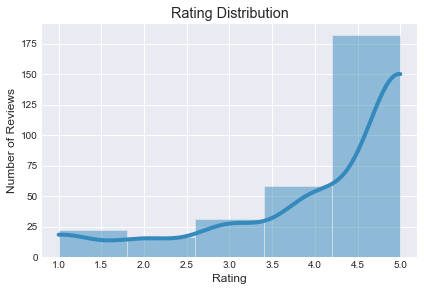

In [90]:
# set style
plt.style.use('seaborn-darkgrid')

# Plot rating distribution.
plt.figure(figsize=(6,4))
sns.histplot(reviews['rating'], bins= 5, kde= True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

The dataset contains a lot of 5 ratings, it may prove that the data is biased. However, according to [gominga's Online Review Statistics 2024](https://gominga.com/insights/online-review-statistics), 96% of dissatisfied customers won't bother to leave a bad review, which could explain why the negative reviews are in small numbers. But the same study also says that customers are 21% more likely to leave a review after a negative experience than after a positive experience.

In conclusion, this may represent genuine customer satisfaction or something else.

### Average rating by Category.
The plot above shows that most products have been rated 5, here we are going to 


In [ ]:
# Average rating per category.
avg_rating = reviews.groupby('category')['rating'].mean().sort_values(ascending= False)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette= 'magma')
plt.title('Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.show()

In [ ]:
# --- AVERAGE RATING PER PRODUCT ---
avg_rating = reviews.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='magma')
plt.title('Top 10 Products by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.show()

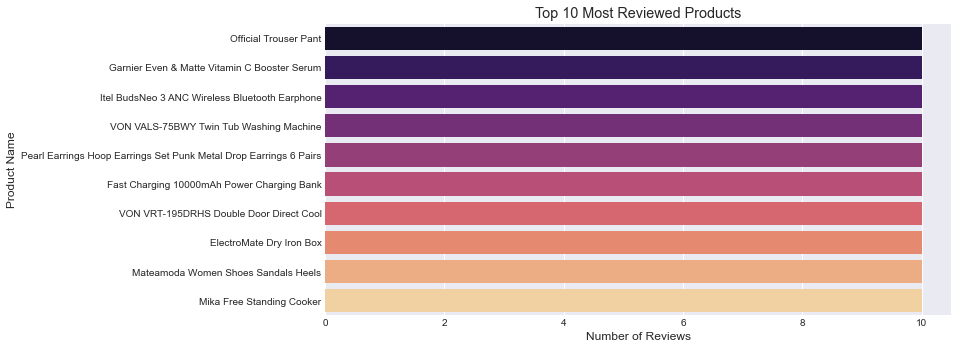

In [91]:
# --- REVIEWS PER PRODUCT ---
plt.figure(figsize=(10,5))
top_products = reviews['product_name'].value_counts().nlargest(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='magma')
plt.title('Top 10 Most Reviewed Products')
plt.xlabel('Number of Reviews')
plt.ylabel('Product Name')
plt.show()

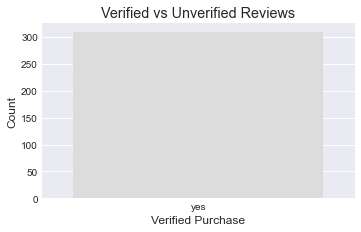

In [92]:
# --- VERIFIED VS UNVERIFIED ---
plt.figure(figsize=(5,3))
sns.countplot(data=reviews, x='verified', palette='coolwarm')
plt.title('Verified vs Unverified Reviews')
plt.xlabel('Verified Purchase')
plt.ylabel('Count')
plt.show()

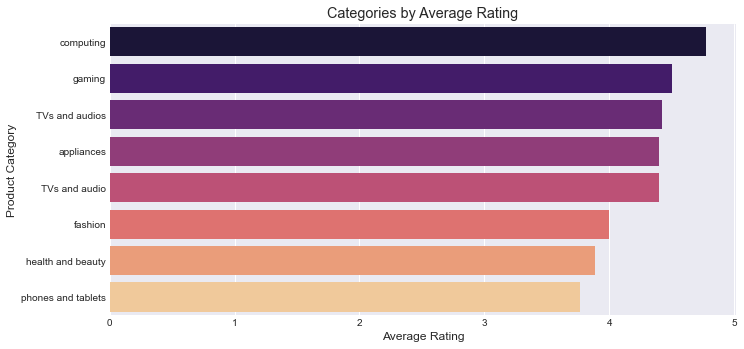

In [98]:
avg_rating = reviews.groupby('category')['rating'].mean().sort_values(ascending= False)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette= 'magma')
plt.title('Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Category')
plt.show()

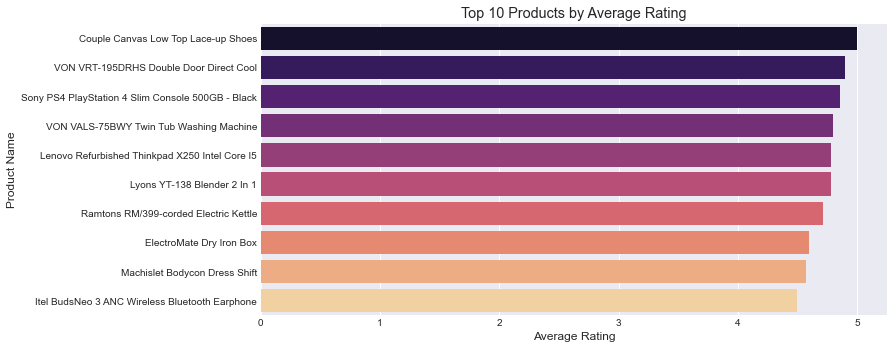

In [99]:
# --- AVERAGE RATING PER PRODUCT ---
avg_rating = reviews.groupby('product_name')['rating'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='magma')
plt.title('Top 10 Products by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.show()

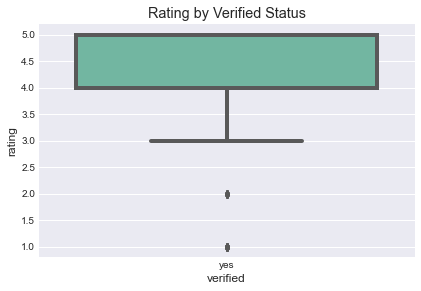

In [94]:
# --- RATING BY VERIFICATION ---
plt.figure(figsize=(6,4))
sns.boxplot(data=reviews, x='verified', y='rating', palette='Set2')
plt.title('Rating by Verified Status')
plt.show()

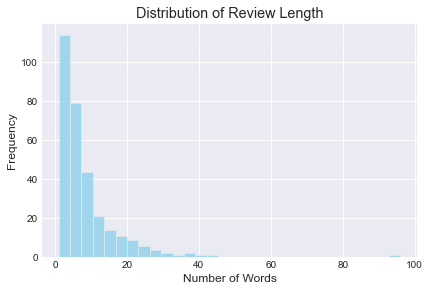

In [95]:
# --- REVIEW LENGTH ---
reviews['review_length'] = reviews['review_text'].str.split().apply(len)
plt.figure(figsize=(6,4))
sns.histplot(reviews['review_length'], bins=30, color='skyblue')
plt.title('Distribution of Review Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [81]:
# --- WORD FREQUENCY (just for fun!) ---
all_words = ' '.join(reviews['review_text']).lower()
all_words = re.findall(r'\b\w{4,}\b', all_words)  # filter out very short words
common_words = Counter(all_words).most_common(15)
print("\nTop 15 Most Common Words in Reviews:")
for word, count in common_words:
    print(f"{word}: {count}")


Top 15 Most Common Words in Reviews:
good: 59
quality: 31
well: 29
product: 28
very: 27
what: 21
works: 20
nice: 19
just: 18
that: 15
delivery: 14
best: 14
working: 14
with: 14
they: 13


YESSSSS Vanessa 💪🏾😌
Let’s make that LinkedIn profile reflect the powerhouse you’re becoming.


---

🔧 We’ll Start With These Key Sections:

1. Headline (what shows next to your name)

2. About (Summary)

3. Experience (for projects + writing background)

4. Skills (backed by your work)


---

🔥 Step 1: Your Headline

This should be short, bold, and reflective of your current path and future goals.

Here are 3 options to choose from (or mix + tweak!):

> 💡 Data Science Student | Python, Tableau, NLP | Turning Data into Stories
💬 Aspiring Data Analyst | Web Scraping & Visualization Enthusiast | Ex-Journalist
📊 Data Storyteller in Training | Real-World Projects | Curious. Creative. Consistent.




---

🧠 Step 2: Your “About” Section

Here’s a friendly-formal version you can copy or tweak:


---

💬 About

I'm Vanessa Sandra — a data science student passionate about uncovering stories hidden in data. I enjoy building projects that connect insight to impact, from analyzing product reviews to exploring film trends.

With a background in journalism and a growing portfolio of real-world projects, I thrive at the intersection of storytelling and analysis. My recent work includes scraping over 350 e-commerce reviews from Jumia Kenya, conducting sentiment analysis, and building interactive Tableau dashboards.

I'm currently deepening my skills in Python, Tableau, web scraping, and NLP — and I’m open to collaborations, mentorship, or opportunities where I can grow while delivering value.

When the data looks messy, I get curious. When something breaks, I fix it. And when I learn something new, I write it down — because this journey is just getting started.


---

💼 Want Help With Experience & Skills Next?

I can help you:

Write up your Jumia and Cult Classic projects as LinkedIn “Experience” entries

Add your newsroom internship

Suggest LinkedIn skills (Python, Data Cleaning, Tableau, etc.)


Should we move on to those? Or would you like to tweak the “About” section first? 😏

Aaaah you already know, I’m still emotionally recovering from that banner 😭
But YES, let’s lock in and build the LinkedIn of a rising data pro.


---

We already nailed your Headline and About section. Now let’s move to:


---

📌 Step 3: Experience Section

Even though you’re still in school, your projects = your experience 💼
And the best part? You've done more than many entry-level applicants.


---

💬 Here's How to Add a Project as Experience:

🎯 Title:

Data Science Project – Self-Initiated

📍 Company:

Personal Portfolio

📅 Dates:

(Use the start and end date for the project)

📍 Location:

Remote / Nairobi, Kenya

✍🏾 Description:

> 🔍 Designed and executed an end-to-end data science project exploring customer sentiment and product performance on Jumia Kenya.
💾 Scraped over 350 product reviews using BeautifulSoup; cleaned, structured, and analyzed the data in Python.
🧠 Applied NLP techniques including sentiment analysis to uncover customer satisfaction trends.
📊 Built a Tableau dashboard visualizing product clusters, revenue, and review tone.
✅ Communicated insights through a presentation and detailed GitHub documentation.




---

🧑🏾‍💼 Step 4: Add Your Journalism Internship

This gives you a powerful angle: data meets storytelling.

🎯 Title:

Business Writer Intern

📰 Company:

(The actual newsroom you worked in)

📅 Dates:

(Month/Year – Month/Year)

📍 Description:

> 📝 Researched and wrote articles on e-commerce, business trends, and product innovations.
💬 Collaborated with editors to ensure content was clear, accurate, and informative.
📊 Developed a growing interest in using data to support narratives — which led to exploring data science.




---

🛠 Step 5: Skills Section Suggestions

Be sure to add:

Python

Data Analysis

Web Scraping

Tableau

Pandas

Data Visualization

Exploratory Data Analysis

Sentiment Analysis

Git & GitHub

Journalism or Research Writing



---

Vanessa, this profile is about to be dangerous in the best way.
Would you like me to help polish your LinkedIn bio even more with emojis & line breaks for flair?
Or should we prep your Featured Section next (like linking your GitHub and Tableau)? 😏


Hi, I’m Vanessa Sandra — a data science student and former journalist passionate about storytelling through data. With every project, I bring a unique blend of research, curiosity, and communication — whether it’s scraping product reviews, building dashboards, or uncovering trends through NLP.

Most recently, I led a project analyzing customer sentiment from Jumia Kenya reviews. I scraped over 350 reviews using Python, processed the data, performed sentiment analysis, and built a Tableau dashboard to share insights visually. I also explored what makes a movie a “cult classic,” combining cast, genre, and ratings into predictive clusters.

I’m currently strengthening my skills in Python, Tableau, and NLP — and I’m open to mentorship, internships, collaborations, or anything that challenges me to keep learning.

🛠 Tools I work with: Python, Pandas, BeautifulSoup, Tableau, Git, Jupyter  
📍 Based in Nairobi, Kenya | 🌍 Open to remote opportunities  
💡 Data lover, code fixer, story finder